In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import enrichment as enrich
import mdsine2 as md2
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

[DEBUG] Using default logger (stdout, stderr).


# Healthy - enrichment tables

## Data to plot (fixed-module inference samples)

In [3]:
mcmc_loc = Path("/data/local/MDSINE2_Paper/datasets/gibson/healthy/output/mdsine2/inference/merged_studies_fixed_cluster/mcmc.pkl")
mcmc = md2.BaseMCMC.load(mcmc_loc)

## Phylum

None

None

None

None

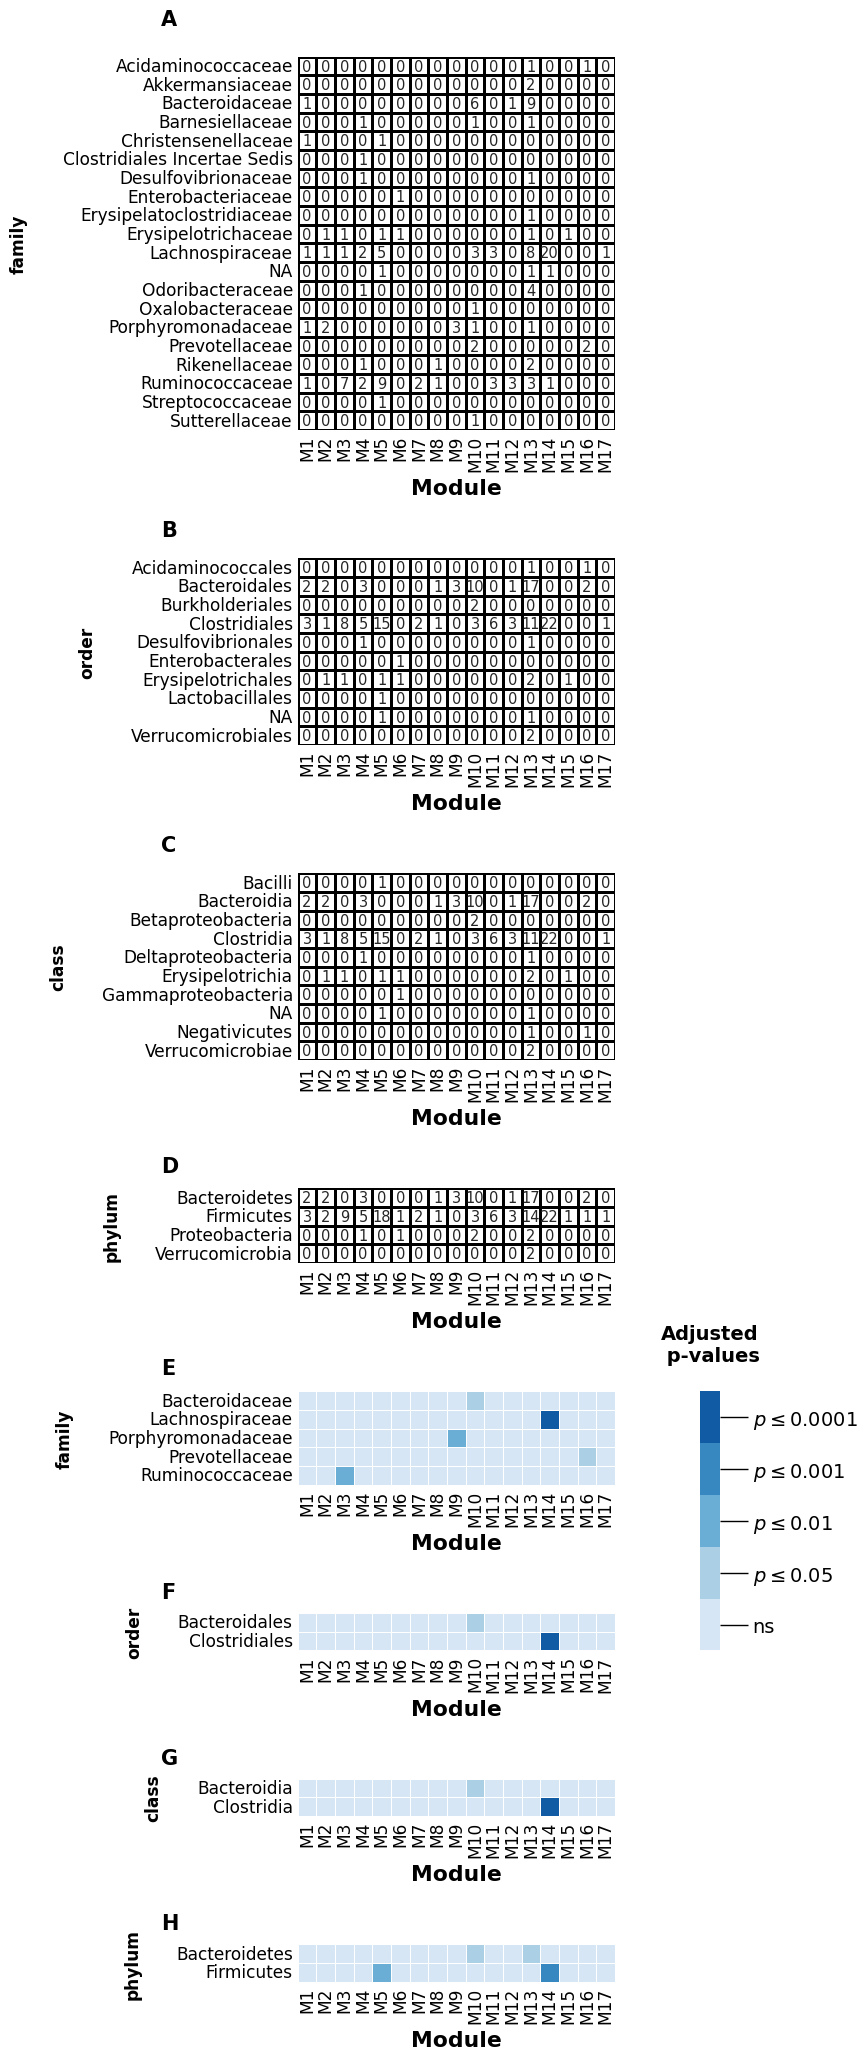

In [16]:
_counter = itertools.count(start=0, step=1)
def empty_ax() -> str:
    return '?_{}'.format(next(_counter))

mosaic = [
    ['family_table', empty_ax()],
    ['order_table', empty_ax()],
    ['class_table', empty_ax()],
    ['phylum_table', empty_ax()],
    ['family_heatmap', 'cbar_legend'],
    ['order_heatmap', 'cbar_legend'],
    ['class_heatmap', empty_ax()],
    ['phylum_heatmap', empty_ax()],
]

fig, axes = plt.subplot_mosaic(
    mosaic, figsize=(6, 25), 
    gridspec_kw={
        'width_ratios': [20, 1],
        'height_ratios': [20, 10, 10, 4, 5, 2, 2, 2],
        'hspace': 1.0,
        'wspace': 0.2,
    }
)
for key, ax in axes.items():
    if key.startswith('?'):
        ax.set_axis_off()

table_dir = Path("tables/sfig_enrichment")
table_dir.mkdir(exist_ok=True, parents=True)

plot_cbar = True
for tax_level in ['family', 'order', 'class', 'phylum']:
    df_enrich_phylum = enrich.run_enrichment_level(mcmc, tax_level, "enrichment_test")
    df_members_phylum = enrich.pivot_cluster_membership(mcmc, tax_level)
    df_enrich_phylum.to_csv(table_dir / f"enrichment_pval.{tax_level}.tsv", sep='\t', index=True)
    enrich.simple_plot(
        df_enrich_phylum, df_members_phylum,
        mcmc.graph.data.subjects.name, tax_level, 
        axes[f'{tax_level}_heatmap'], axes[f'{tax_level}_table'], axes['cbar_legend'], 
        fontsize_scale=0.35,
        plot_cbar=plot_cbar
    )
    display(pval_df)
    if plot_cbar:
        plot_cbar = False


""" Figure labels """
import string
def add_figure_labels(fig, axes, labels=None, dx: float = -25/72, dy: float = -3/72):
    """ add A/B/C/D labels """
    if labels is None:
        labels = [string.ascii_lowercase[n] for n in range(len(axes))]
    if len(labels) != len(axes):
        raise ValueError("Number of labels do not match number of axes.")
    for n, _ax in enumerate(axes):
        # _ax.text(-.1, 1.1, string.ascii_uppercase[n], transform=_ax.transAxes, size=20, weight='bold')
        trans = mtransforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
        lbl = labels[n]
        _ax.text(
            0., 1.05, lbl, transform=_ax.transAxes + trans,
            va='bottom', fontfamily='sans-serif', weight='bold', size=15
        )
        
add_figure_labels(fig, [axes['family_table']], 'A', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['order_table']], 'B', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['class_table']], 'C', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['phylum_table']], 'D', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['family_heatmap']], 'E', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['order_heatmap']], 'F', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['class_heatmap']], 'G', dx=-1.37, dy=+0.09)
add_figure_labels(fig, [axes['phylum_heatmap']], 'H', dx=-1.37, dy=+0.09)

plt.savefig("plots/fixed_module_taxonomic_counts.pdf", bbox_inches='tight')